In [1]:
from functions import *

In [2]:
import matplotlib.pyplot as plt
import glob
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import geopandas as gpd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import glob
import time
from datetime import datetime
from collections import Counter
from PIL import Image

## Visualize experiment

In [3]:
model='baseline_CNN'
exp = 12

In [4]:
errors_df = pd.read_csv(f'../results/error_logs/{model}_exp_{exp}.csv')

#### Experiment details

In [7]:
res=pd.read_excel(f'../results/{model}_results.xlsx')
res
#res[res.Experiment == exp]

,Experiment,RMSE,Variables,Input,Split,nº samples,Batch size,Epochs,Date,Time,Duration,Loss,Resolution
0,0,5.770745,lst,47 rivers,random,968,32,300,2024-11-14,11:39:13,1500.29,Physics-guided,128
1,1,6.100804,lst,47 rivers,random,968,32,300,2024-11-14,12:03:29,1452.81,RMSE,128
2,2,5.495109,lst,47 rivers,random,968,64,300,2024-11-14,12:26:37,1386.13,Physics-guided,128
3,3,5.335479,lst,47 rivers,random,968,64,300,2024-11-14,12:47:43,1261.77,RMSE,128
4,4,5.383340,lst,47 rivers,random,968,128,300,2024-11-14,13:05:31,1066.09,Physics-guided,128
5,5,5.363269,lst,47 rivers,random,968,128,300,2024-11-14,13:22:10,996.08,RMSE,128
6,6,5.442771,lst,80 rivers,random,1628,128,300,2024-11-14,14:51:45,971.66,Physics-guided,128
7,7,5.335798,lst,80 rivers,random,1628,128,300,2024-11-14,15:07:44,955.82,RMSE,128
8,8,5.448506,lst,80 rivers,random,1628,128,300,2024-11-14,15:26:18,868.23,Physics-guided,64
9,9,5.267368,lst,80 rivers,random,1628,128,300,2024-11-14,15:40:22,842.37,RMSE,64


#### Learning curve

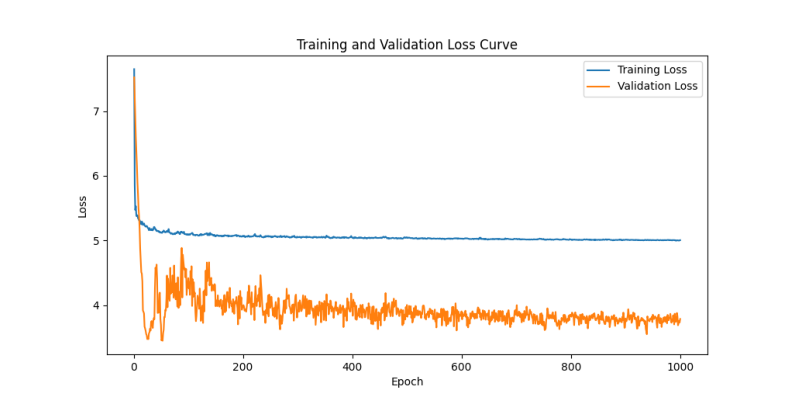

In [6]:
image_path = f'../results/learning_curves/{model}_exp_{exp}.png'
image = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


#### Error log

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=errors_df, x="month", y="error", hue="epoch", palette="viridis", alpha=0.7)
plt.xticks(ticks=sorted(errors_df["month"].unique()))
plt.title("Error depending on the months")
plt.xlabel("Month")
plt.ylabel('Error')
plt.show()

KeyboardInterrupt: 

In [ ]:
epochs = len(errors_df.epoch.unique())
pivot_table = errors_df.pivot_table(values="error", index="epoch", columns="month", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={'label': 'Average Error'})
if epochs == 10:
    ticks = range(epochs + 1)
    labelss = [str(i) for i in range(epochs + 1)]
else:
    ticks = [i for i in range(10, epochs + 1, 10)]
    labelss = [str(i) for i in range(10, epochs + 1, 10)]
plt.yticks(ticks=ticks,labels=labelss)
plt.title("Heatmap of average error by epoch and month")
plt.xlabel("Month")
plt.ylabel("Epoch")
plt.show()

In [ ]:
plt.hist(errors_df.month)

In [ ]:
plt.figure(figsize=(10, 6))
errors_df.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Error Medio')
plt.title('Error Medio del Modelo por Mes')
plt.show()

In [ ]:
frecuencia_por_mes = errors_df['month'].value_counts().sort_index()

print(frecuencia_por_mes)